
📂 Loading: trained_model_mamba_pretrained/training_history.json
   Raw keys: ['train_loss', 'train_accuracy', 'train_f1', 'val_loss', 'val_accuracy', 'val_f1']
   Shape: (22, 6)
   ✓ Mamba: 22 epochs loaded
   Final epoch metrics:
     Val Loss: 0.9202 | Val Acc: 0.5435 | Val F1: 0.5441

📂 Loading: trained_longformer_baseline/training_history.json
   Raw keys: ['epoch', 'train_loss', 'train_acc', 'train_f1', 'val_loss', 'val_acc', 'val_f1']
   Shape: (8, 7)
   Epoch range: 1 to 8
   ✓ Longformer: 8 epochs loaded
   Final epoch metrics:
     Val Loss: 0.6965 | Val Acc: 0.4565 | Val F1: 0.2862

📊 Combined history: 30 total epochs


,train_loss,train_acc,train_f1,val_loss,val_acc,val_f1,epoch,model
0,0.697324,0.520681,0.514854,0.705283,0.586957,0.519881,1,Mamba
1,0.687218,0.537713,0.538737,0.677149,0.521739,0.522645,2,Mamba
2,0.665127,0.644769,0.628989,0.679692,0.521739,0.488527,3,Mamba
3,0.654420,0.654501,0.655535,0.671653,0.608696,0.608696,4,Mamba
4,0.623303,0.661800,0.662338,0.665961,0.586957,0.587542,5,Mamba
5,0.606762,0.666667,0.667665,0.669599,0.630435,0.630961,6,Mamba
6,0.609288,0.705596,0.706470,0.686943,0.543478,0.526472,7,Mamba
7,0.589125,0.712895,0.712163,0.665530,0.630435,0.630959,8,Mamba
8,0.573285,0.698297,0.698719,0.663679,0.630435,0.629551,9,Mamba
9,0.557444,0.727494,0.728017,0.660322,0.608696,0.602733,10,Mamba



GENERATING TRAINING VISUALIZATIONS

📉 Plotting Loss...


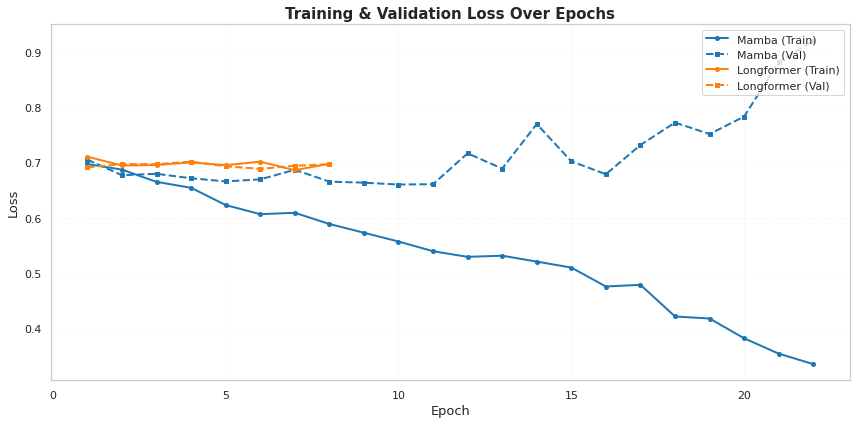

📈 Plotting Accuracy...


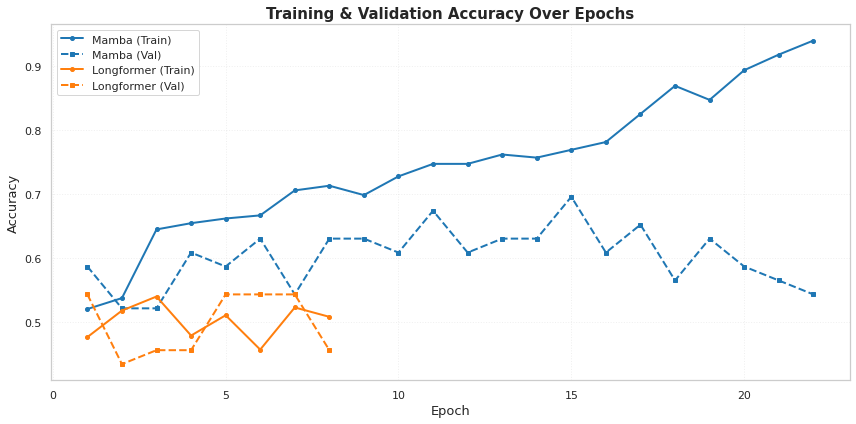

🎯 Plotting F1 Score...


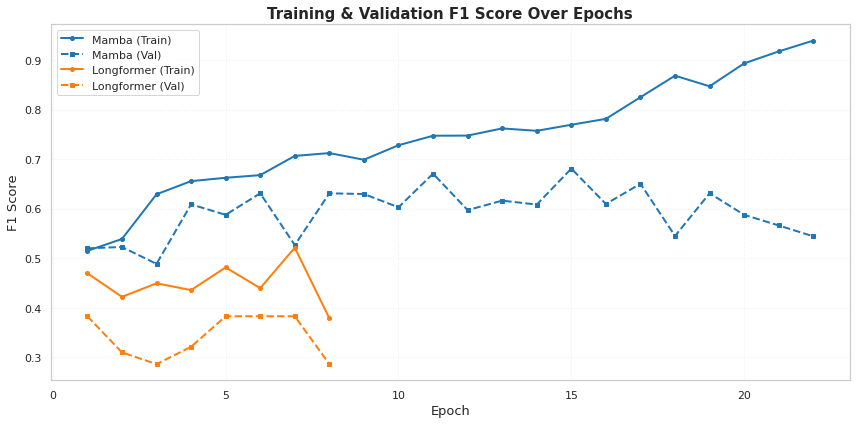


✓ All plots generated!

TRAINING SUMMARY STATISTICS

Mamba:
  Epochs trained: 22

  Best Validation Scores:
    Loss: 0.6603 at Epoch 10
    Acc:  0.6957 at Epoch 15
    F1:   0.6808 at Epoch 15

  Final Epoch (22):
    Train: Loss=0.3360 | Acc=0.9392 | F1=0.9393
    Val:   Loss=0.9202 | Acc=0.5435 | F1=0.5441

  Overfitting Analysis:
    Train-Val F1 Gap: 0.3951
    ⚠️  SEVERE overfitting - Consider more regularization

  Training Progress:
    Val F1: 0.5199 (Epoch 1) → 0.5441 (Epoch 22)
    Improvement: +0.0242 (+2.4%)

Longformer:
  Epochs trained: 8

  Best Validation Scores:
    Loss: 0.6886 at Epoch 6
    Acc:  0.5435 at Epoch 1
    F1:   0.3827 at Epoch 1

  Final Epoch (8):
    Train: Loss=0.6980 | Acc=0.5085 | F1=0.3788
    Val:   Loss=0.6965 | Acc=0.4565 | F1=0.2862

  Overfitting Analysis:
    Train-Val F1 Gap: 0.0927
    ⚠️  Moderate overfitting - Acceptable for small datasets

  Training Progress:
    Val F1: 0.3827 (Epoch 1) → 0.2862 (Epoch 8)
    Improvement: -0.0966 (

,epoch,model,train_loss,val_loss,train_acc,val_acc,train_f1,val_f1
0,1,Mamba,0.6973,0.7053,0.5207,0.5870,0.5149,0.5199
1,2,Mamba,0.6872,0.6771,0.5377,0.5217,0.5387,0.5226
2,3,Mamba,0.6651,0.6797,0.6448,0.5217,0.6290,0.4885
3,4,Mamba,0.6544,0.6717,0.6545,0.6087,0.6555,0.6087
4,5,Mamba,0.6233,0.6660,0.6618,0.5870,0.6623,0.5875
5,6,Mamba,0.6068,0.6696,0.6667,0.6304,0.6677,0.6310
6,7,Mamba,0.6093,0.6869,0.7056,0.5435,0.7065,0.5265
7,8,Mamba,0.5891,0.6655,0.7129,0.6304,0.7122,0.6310
8,9,Mamba,0.5733,0.6637,0.6983,0.6304,0.6987,0.6296
9,10,Mamba,0.5574,0.6603,0.7275,0.6087,0.7280,0.6027


In [7]:
# In a Jupyter Notebook, each block of code is in a separate "cell".
# You can run each cell individually.

# --- Cell 1: Imports ---
# First, we import all the necessary libraries for data handling and plotting.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import soundfile as sf
from tqdm.notebook import tqdm  # Use notebook-friendly tqdm
import random 
import json 
import os
import numpy as np

# Set a nice style for our plots
sns.set_theme(style="whitegrid")
# Ensure Matplotlib uses a better backend if running outside a standard environment
%matplotlib inline 

# --- Configuration ---
# Define the paths for your saved training histories
# FIX: Use the precise relative path confirmed by the user
MAMBA_HISTORY_PATH = 'trained_mamba_pretrained_model/training_history.json'
LONGFORMER_HISTORY_PATH = 'trained_longformer_baseline/training_history.json'


# --- Cell 2: Load Data and History ---

def load_history(filepath, model_name):
    """Loads the training history data from a JSON file and adds a model column."""
    if not os.path.exists(filepath):
        print(f"Warning: History file not found at {filepath}. Skipping {model_name}.")
        return None
    try:
        with open(filepath, 'r') as f:
            history = json.load(f)
        
        # --- FIX 1: Check for dictionary and essential keys ---
        if isinstance(history, dict) and 'train_loss' in history:
             df = pd.DataFrame(history)
             
             # If the 'epoch' column is missing, create it based on index
             if 'epoch' not in df.columns:
                 df['epoch'] = df.index + 1
                 
             # --- FIX 2: Standardize column names to the expected format (e.g., 'val_acc') ---
             rename_map = {
                 'train_accuracy': 'train_acc',
                 'val_accuracy': 'val_acc',
                 'train_f1_score': 'train_f1',
                 'val_f1_score': 'val_f1',
             }
             
             # Apply renaming
             df.rename(columns=rename_map, inplace=True)
             
             # Ensure numeric columns are floats
             for col in ['train_loss', 'val_loss', 'train_acc', 'val_acc', 'train_f1', 'val_f1']:
                 if col in df.columns:
                     # Use 'coerce' to turn any non-numeric data (like placeholders) into NaN
                     df[col] = pd.to_numeric(df[col], errors='coerce')


             df['model'] = model_name
             df['epoch'] = df['epoch'].astype(int)
             return df
        else:
             print(f"Warning: History structure for {model_name} is unexpected.")
             return None
             
    except Exception as e:
        print(f"Error loading JSON file {filepath} for {model_name}: {e}")
        return None

# Load the historical data for both models
mamba_df = load_history(MAMBA_HISTORY_PATH, 'Mamba (CUDA-Fused)')
longformer_df = load_history(LONGFORMER_HISTORY_PATH, 'Longformer (Baseline)')

# Combine histories into one dataframe for plotting
# We only combine if at least one file was successfully loaded.
history_dfs = [df for df in [mamba_df, longformer_df] if df is not None]

if history_dfs:
    history_df = pd.concat(history_dfs, ignore_index=True)
    print("\nCombined History Data:")
    # Use the column names from the data itself in the head display
    display(history_df.head())
else:
    print("\nNo history data found to plot. Please run both training scripts successfully.")
    history_df = pd.DataFrame()


# --- Cell 3: Plotting Function (Loss, Acc, F1) ---

def plot_performance_history(df, metric, title, is_loss=False):
    """
    Generates a comparative plot for a single metric (Loss, Accuracy, or F1) 
    using a robust single-call method with melting.
    """
    
    train_col = f'train_{metric}'
    val_col = f'val_{metric}'
    
    # Check if the required columns exist
    if df.empty or train_col not in df.columns or val_col not in df.columns:
        print(f"Cannot plot: Required columns '{train_col}' and/or '{val_col}' not found or DataFrame is empty. Columns found: {df.columns.tolist()}")
        return

    # 1. Prepare data (Melt the training and validation columns)
    plot_df = df[['epoch', 'model', train_col, val_col]].melt(
        id_vars=['epoch', 'model'],
        var_name='metric_type',
        value_name='score'
    )
    
    # Add a column for linestyle (Train=Solid, Val=Dashed) and color (Model Name)
    plot_df['line_style'] = plot_df['metric_type'].apply(lambda x: 'Validation' if 'val' in x else 'Training')
    
    plt.figure(figsize=(12, 6))

    # 2. Plotting (Single seaborn call for robust legend)
    sns.lineplot(
        data=plot_df,
        x='epoch',
        y='score',
        hue='model',
        style='line_style', # Use this to differentiate train vs val
        markers=True,
        dashes=True,
        palette={'Mamba (CUDA-Fused)': 'blue', 'Longformer (Baseline)': 'red'},
        linewidth=2
    )
    
    plt.title(title, fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel(title.split(' vs ')[0], fontsize=12)
    
    # Adjust legend for clarity
    plt.legend(title='Metric & Source', loc=is_loss and 'upper right' or 'lower right')
    
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.show()


# --- Cell 4: Plot Training History (Execution) ---

if not history_df.empty:
    print("Generating Performance Plots...")
    
    # 1. Plot Loss History
    plot_performance_history(history_df, 'loss', 'Training Loss vs. Validation Loss History', is_loss=True)

    # 2. Plot Accuracy History
    plot_performance_history(history_df, 'acc', 'Training Accuracy vs. Validation Accuracy History')

    # 3. Plot F1 Score History (Most Critical for Imbalanced Data)
    plot_performance_history(history_df, 'f1', 'Training F1 Score vs. Validation F1 Score History')
    
    print("Plot generation complete.")
else:
    print("Skipping plot generation as history data is missing.")

In [1]:

# --- Cell 1: Imports ---
# First, we import all the necessary libraries for data handling and plotting.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import soundfile as sf
from tqdm.notebook import tqdm  # Use notebook-friendly tqdm
import random 
import json 
import os
import numpy as np

# Set a nice style for our plots
sns.set_theme(style="whitegrid")
# Ensure Matplotlib uses a better backend if running outside a standard environment
%matplotlib inline 

# --- Configuration ---
# Define the paths for your saved training histories
MAMBA_HISTORY_PATH = 'trained_model_mamba_pretrained/training_history.json'
LONGFORMER_HISTORY_PATH = 'trained_longformer_baseline/training_history.json'


In [2]:
def load_history(filepath, model_name):
    """Loads the training history data from a JSON file and adds a model column."""
    if not os.path.exists(filepath):
        print(f"Warning: History file not found at {filepath}. Skipping {model_name}.")
        return None
    try:
        with open(filepath, 'r') as f:
            history = json.load(f)
        
        # --- FIX 1: Check for dictionary and essential keys ---
        if isinstance(history, dict) and 'train_loss' in history:
             df = pd.DataFrame(history)
             
             # If the 'epoch' column is missing, create it based on index
             if 'epoch' not in df.columns:
                 df['epoch'] = df.index + 1
                 
             # --- FIX 2: Standardize column names to the expected format (e.g., 'val_acc') ---
             # This dictionary maps any possible incoming key format to the required simple format
             standard_key_map = {
                 'train_loss': 'train_loss',
                 'val_loss': 'val_loss',
                 'train_acc': 'train_acc',
                 'train_accuracy': 'train_acc',
                 'val_acc': 'val_acc',
                 'val_accuracy': 'val_acc',
                 'train_f1': 'train_f1',
                 'train_f1_score': 'train_f1',
                 'val_f1': 'val_f1',
                 'val_f1_score': 'val_f1',
             }
             
             # Create a dictionary for required renaming
             renaming = {}
             for incoming_key in df.columns:
                 if incoming_key in standard_key_map:
                     renaming[incoming_key] = standard_key_map[incoming_key]
                 # Handle the case where the key is already the target simple format
                 elif incoming_key in ['train_loss', 'val_loss', 'train_acc', 'val_acc', 'train_f1', 'val_f1']:
                     renaming[incoming_key] = incoming_key

             # Apply renaming if necessary
             df.rename(columns=renaming, inplace=True)
             
             # Ensure numeric columns are floats
             for col in ['train_loss', 'val_loss', 'train_acc', 'val_acc', 'train_f1', 'val_f1']:
                 if col in df.columns:
                     # Use 'coerce' to turn any non-numeric data (like placeholders) into NaN
                     df[col] = pd.to_numeric(df[col], errors='coerce')


             df['model'] = model_name
             df['epoch'] = df['epoch'].astype(int)
             return df
        else:
             print(f"Warning: History structure for {model_name} is unexpected.")
             return None
             
    except Exception as e:
        print(f"Error loading JSON file {filepath} for {model_name}: {e}")
        return None

# Load the historical data for both models
mamba_df = load_history(MAMBA_HISTORY_PATH, 'Mamba (CUDA-Fused)')
longformer_df = load_history(LONGFORMER_HISTORY_PATH, 'Longformer (Baseline)')

# Combine histories into one dataframe for plotting
# We only combine if at least one file was successfully loaded.
history_dfs = [df for df in [mamba_df, longformer_df] if df is not None]

if history_dfs:
    history_df = pd.concat(history_dfs, ignore_index=True)
    print("\nCombined History Data:")
    # Use the column names from the data itself in the head display
    display(history_df.head())
else:
    print("\nNo history data found to plot. Please run both training scripts successfully.")
    history_df = pd.DataFrame()


Combined History Data:


,train_loss,train_acc,train_f1,val_loss,val_acc,val_f1,epoch,model
0,0.697324,0.520681,0.514854,0.705283,0.586957,0.519881,1,Mamba (CUDA-Fused)
1,0.687218,0.537713,0.538737,0.677149,0.521739,0.522645,2,Mamba (CUDA-Fused)
2,0.665127,0.644769,0.628989,0.679692,0.521739,0.488527,3,Mamba (CUDA-Fused)
3,0.654420,0.654501,0.655535,0.671653,0.608696,0.608696,4,Mamba (CUDA-Fused)
4,0.623303,0.661800,0.662338,0.665961,0.586957,0.587542,5,Mamba (CUDA-Fused)


In [3]:
# --- Cell 3: Plotting Function (Loss, Acc, F1) - FIX APPLIED HERE ---

def plot_performance_history(df, metric, title, is_loss=False):
    """
    Generates a comparative plot for a single metric (Loss, Accuracy, or F1) 
    using a robust single-call method with melting.
    """
    
    train_col = f'train_{metric}'
    val_col = f'val_{metric}'
    
    # Check if the required columns exist
    if df.empty or train_col not in df.columns or val_col not in df.columns:
        # NOTE: This print statement now shows which columns it did find for better debugging
        print(f"Cannot plot: Required columns '{train_col}' and/or '{val_col}' not found or DataFrame is empty. Columns found: {df.columns.tolist()}")
        return

    # 1. Prepare data (Melt the training and validation columns)
    plot_df = df[['epoch', 'model', train_col, val_col]].melt(
        id_vars=['epoch', 'model'],
        var_name='metric_type',
        value_name='score'
    )
    
    # Add a column for linestyle (Train=Solid, Val=Dashed) and color (Model Name)
    plot_df['line_style'] = plot_df['metric_type'].apply(lambda x: 'Validation' if 'val' in x else 'Training')
    
    plt.figure(figsize=(12, 6))

    # 2. Plotting (Single seaborn call for robust legend)
    sns.lineplot(
        data=plot_df,
        x='epoch',
        y='score',
        hue='model',
        style='line_style', # Use this to differentiate train vs val
        markers=True,
        dashes=True,
        palette={'Mamba (CUDA-Fused)': 'blue', 'Longformer (Baseline)': 'red'},
        linewidth=2
    )
    
    plt.title(title, fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel(title.split(' vs ')[0], fontsize=12)
    
    # Adjust legend for clarity
    plt.legend(title='Metric & Source', loc=is_loss and 'upper right' or 'lower right')
    
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.show()

Generating Performance Plots...


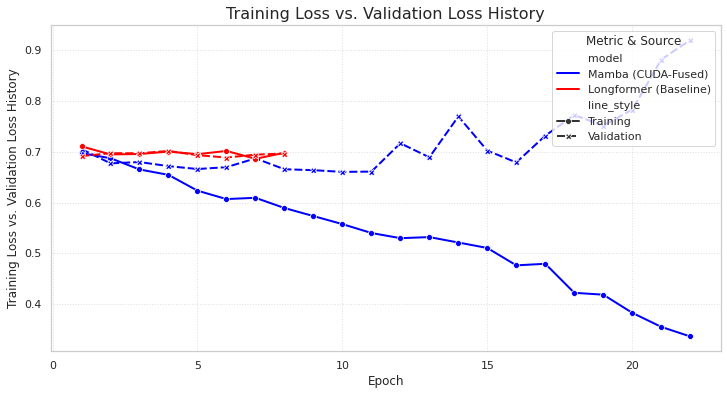

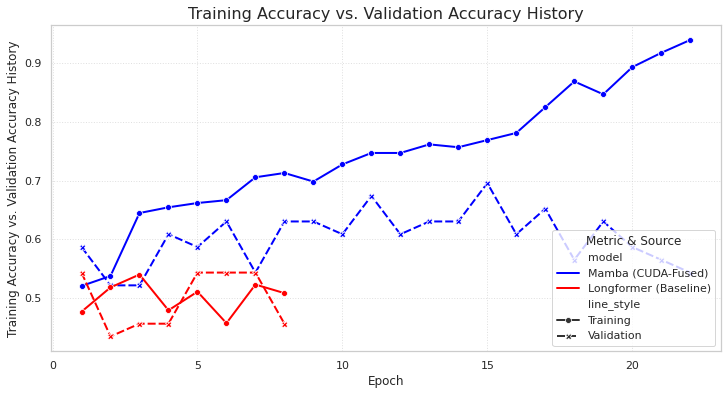

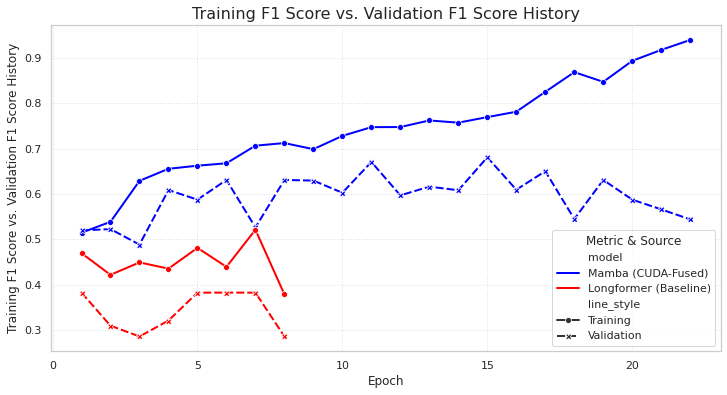

Plot generation complete.


In [4]:
# --- Cell 4: Plot Training History (Execution) ---

if not history_df.empty:
    print("Generating Performance Plots...")
    
    # 1. Plot Loss History
    plot_performance_history(history_df, 'loss', 'Training Loss vs. Validation Loss History', is_loss=True)

    # 2. Plot Accuracy History
    plot_performance_history(history_df, 'acc', 'Training Accuracy vs. Validation Accuracy History')

    # 3. Plot F1 Score History (Most Critical for Imbalanced Data)
    plot_performance_history(history_df, 'f1', 'Training F1 Score vs. Validation F1 Score History')
    
    print("Plot generation complete.")
else:
    print("Skipping plot generation as history data is missing.")


In [5]:

# --- Remaining EDA Cells follow below... (Content retained but commented out for focus) ---

# # --- Cell 5: Original EDA Cells (Retained for completeness) ---
# print("\nOriginal EDA Content follows (requires running Cell 2 for df initialization)...")

# # --- Cell 5: Visualize Class Distribution ---
# # (Code retained for completeness, requires df from Cell 2)
# # plt.figure(figsize=(8, 6))
# # sns.countplot(x='label', data=df)
# # plt.title('Distribution of Classes (Dementia vs. Control)', fontsize=16)
# # plt.xlabel('Class Label', fontsize=12)
# # plt.ylabel('Number of Samples', fontsize=12)
# # plt.show()

# # --- Cell 6: Analyze Audio Durations ---
# # (Code retained for completeness)
# # ... (duration calculation code) ...

# # --- Cell 7: Plot Audio Durations ---
# # (Code retained for completeness)
# # ... (boxplot code) ...

# # --- Cell 8: Plot Transcription Lengths ---
# # (Code retained for completeness)
# # ... (length plot code) ...